In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  # Use for creating graphs 
import seaborn as sns   # Use for creating advanced graphs

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler



# - Data-Preperation & Data Cleaning

In [2]:

Employee_Data = pd.read_csv('IBM-HR-Employee-Attrition.csv') # Loading Dataset

In [3]:
Employee_Data.head() # Print top 5 rows in the dataframe.

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
Employee_Data.tail() # Print bottom 5 rows in the dataframe

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
Employee_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
Employee_Data.shape  # Shape of the Datafream


(1470, 35)

In [7]:
Employee_Data.__len__()  # Total numbers of roes of the DataFrame

1470

In [8]:
Employee_Data.columns.__len__()  # LEnght numbers of Columns of the DataFrame

35

In [9]:
Employee_Data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
# Check the Non-Null or NaN values in the Dataset
Employee_Data.info()
# There are 26 Numerical & 9 Categorical Attributes in the dataset.
                        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
#There are 26 Numerical data in the dataset.
Employee_Data.select_dtypes(np.number).head(26)  

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
5,32,1005,2,2,1,8,4,79,3,1,...,3,80,0,8,2,2,7,7,3,6
6,59,1324,3,3,1,10,3,81,4,1,...,1,80,3,12,3,2,1,0,0,0
7,30,1358,24,1,1,11,4,67,3,1,...,2,80,1,1,2,3,1,0,0,0
8,38,216,23,3,1,12,4,44,2,3,...,2,80,0,10,2,3,9,7,1,8
9,36,1299,27,3,1,13,3,94,3,2,...,2,80,2,17,3,2,7,7,7,7


In [12]:
# There are 9 Categorical data in the dataset.
Employee_Data.select_dtypes(include='O').head(9)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
5,No,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Y,No
6,No,Travel_Rarely,Research & Development,Medical,Female,Laboratory Technician,Married,Y,Yes
7,No,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Divorced,Y,No
8,No,Travel_Frequently,Research & Development,Life Sciences,Male,Manufacturing Director,Single,Y,No


In [13]:
Missing_Values = Employee_Data.isnull().sum()
Missing_Values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [14]:
Employee_Data.describe()  

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [15]:
# number of unique values in each column
Employee_Data.nunique().head(20)

Age                          43
Attrition                     2
BusinessTravel                3
DailyRate                   886
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeNumber             1470
EnvironmentSatisfaction       4
Gender                        2
HourlyRate                   71
JobInvolvement                4
JobLevel                      5
JobRole                       9
JobSatisfaction               4
MaritalStatus                 3
MonthlyIncome              1349
MonthlyRate                1427
dtype: int64

In [16]:
Employee_Data.nunique().tail(15)

NumCompaniesWorked          10
Over18                       1
OverTime                     2
PercentSalaryHike           15
PerformanceRating            2
RelationshipSatisfaction     4
StandardHours                1
StockOptionLevel             4
TotalWorkingYears           40
TrainingTimesLastYear        7
WorkLifeBalance              4
YearsAtCompany              37
YearsInCurrentRole          19
YearsSinceLastPromotion     16
YearsWithCurrManager        18
dtype: int64

In [17]:
# Check for duplicate Observations
Employee_Data.duplicated().sum()

np.int64(0)

# Visualization

~ Distribution of Attrition, BusinessTravel, Department, Education Field, JobRoal, MaritalStatus, Overtime, Gender,

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


<Axes: xlabel='BusinessTravel', ylabel='count'>

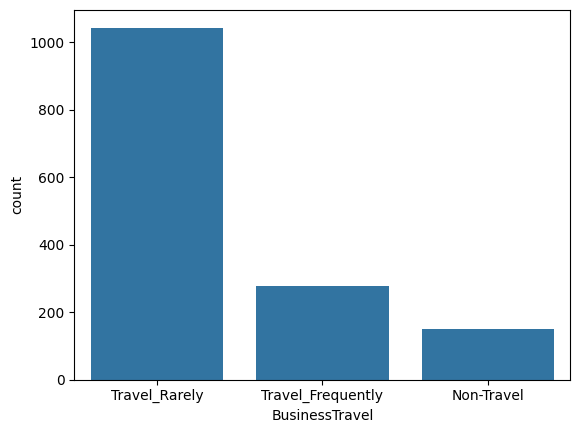

In [18]:
print(Employee_Data['BusinessTravel'].value_counts())
sns.countplot(x = Employee_Data['BusinessTravel'])

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


<Axes: xlabel='Department', ylabel='count'>

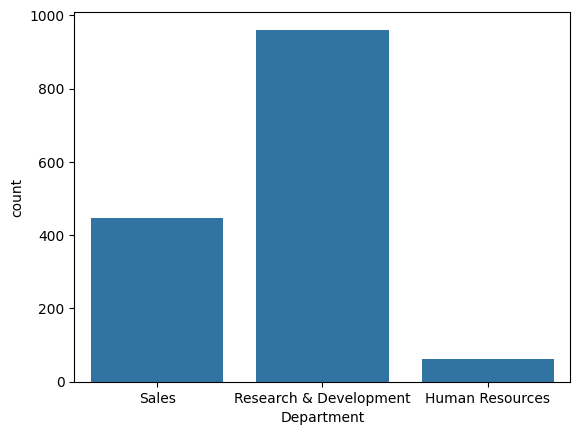

In [19]:
print(Employee_Data['Department'].value_counts())
sns.countplot(x = Employee_Data['Department'])

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


<Axes: xlabel='EducationField', ylabel='count'>

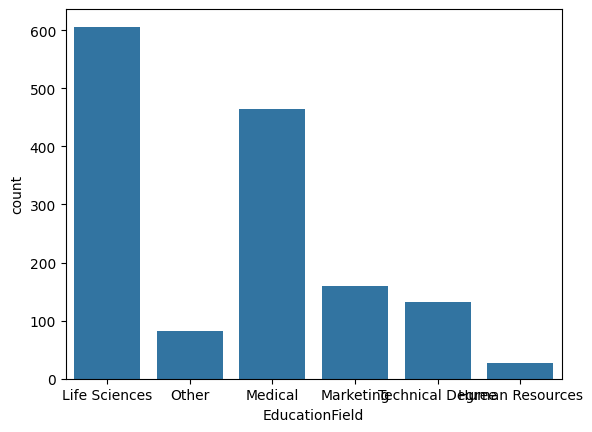

In [20]:
print(Employee_Data['EducationField'].value_counts())
sns.countplot(x = Employee_Data['EducationField'])

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='JobRole'>

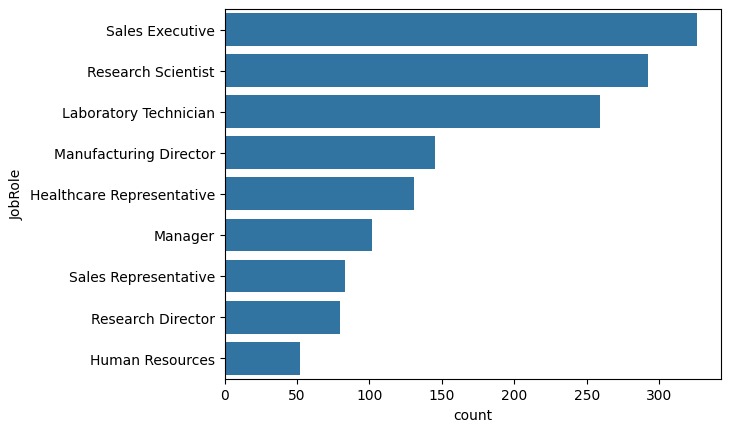

In [21]:
print(Employee_Data['JobRole'].value_counts())
sns.countplot(y = Employee_Data['JobRole'])

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


<Axes: xlabel='MaritalStatus', ylabel='count'>

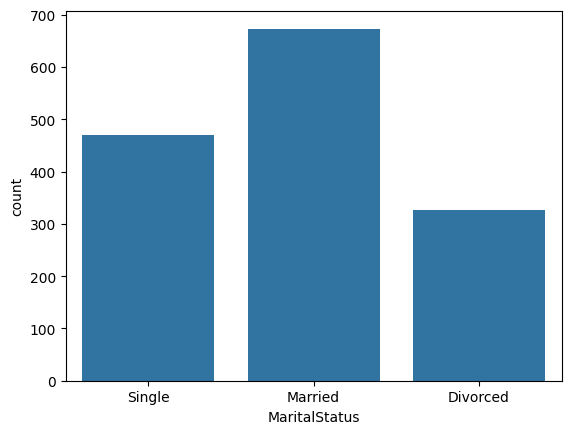

In [22]:
print(Employee_Data['MaritalStatus'].value_counts())
sns.countplot(x = Employee_Data['MaritalStatus'])

OverTime
No     1054
Yes     416
Name: count, dtype: int64


<Axes: xlabel='OverTime', ylabel='count'>

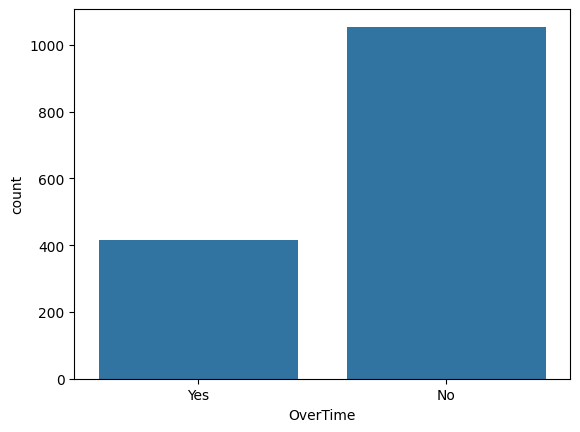

In [23]:
print(Employee_Data['OverTime'].value_counts())
sns.countplot(x = Employee_Data['OverTime'])

Gender
Male      882
Female    588
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

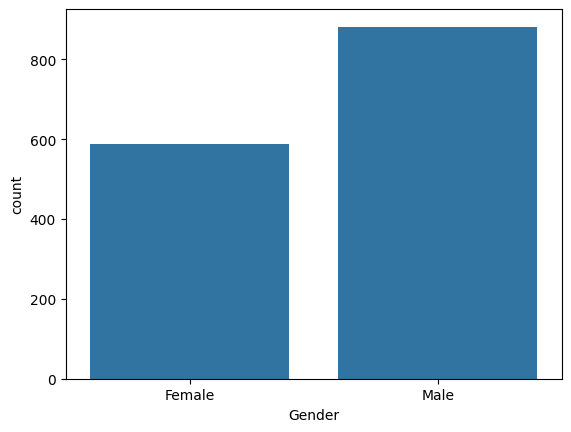

In [24]:
print(Employee_Data['Gender'].value_counts())
sns.countplot(x = Employee_Data['Gender'])

Attrition:
 Attrition
No     1233
Yes     237
Name: count, dtype: int64
Attrition:
 Attrition
No     1233
Yes     237
Name: count, dtype: int64


C:\Users\Hp\AppData\Local\Temp\ipykernel_5132\3108546364.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = Attrition_rate.index, y = Attrition_rate.values,palette=['#ac7339','#d9b38c'])


([<matplotlib.patches.Wedge at 0x266a7670ad0>,
 [Text(-0.9618917098664642, 0.5336331497294465, 'No'),
  Text(0.9618917565181541, -0.5336330656381971, 'Yes')],
 [Text(-0.5246682053817077, 0.29107262712515264, '83.88%'),
  Text(0.524668230828084, -0.2910725812571984, '16.12%')])

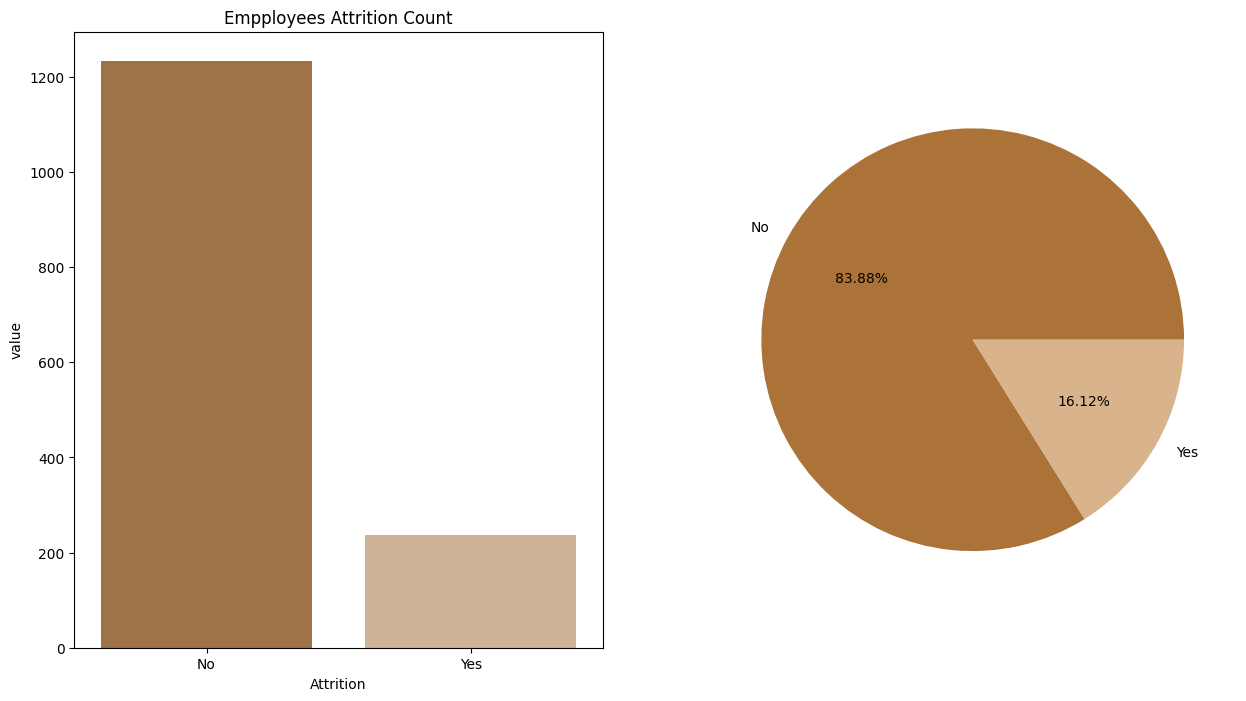

In [25]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
Attrition_rate = Employee_Data['Attrition'].value_counts()
print('Attrition:' '\n', Attrition_rate)
#sns.set(style='whitegrid')
sns.barplot(x = Attrition_rate.index, y = Attrition_rate.values,palette=['#ac7339','#d9b38c'])
plt.title('Empployees Attrition Count')  
plt.xlabel('Attrition')
plt.ylabel('value')

# Visualization to show Employee Attrition in Percentage
plt.subplot(1,2,2)
# Attrition_rate = Employee_Data['Attrition'].value_counts()
print('Attrition:' '\n', Attrition_rate)
plt.pie(Attrition_rate, labels = ['No','Yes'], colors = ['#ac7339','#d9b38c'], autopct = '%.2f%%')



([<matplotlib.patches.Wedge at 0x266aa99fed0>,
 [Text(-0.339918873399729, 1.0461621095732052, 'Male'),
  Text(0.33991884014588697, -1.0461621203780394, 'Female')],
 [Text(-0.18541029458167035, 0.570633877949021, '60%'),
  Text(0.18541027644321104, -0.5706338838425669, '40%')])

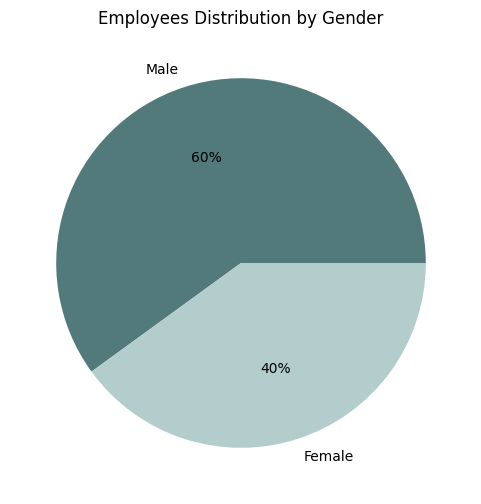

In [26]:
#Pie Chart for Total Employees Distribution by Gender
plt.figure(figsize=(14,6))
Gender_attrition = Employee_Data['Gender'].value_counts()
plt.title('Employees Distribution by Gender')
plt.pie(Gender_attrition, labels=Gender_attrition.index,autopct='%.0f%%', colors=['#527a7a', '#b3cccc'])

Text(0.5, 1.0, 'Employee Distribution by Age ')

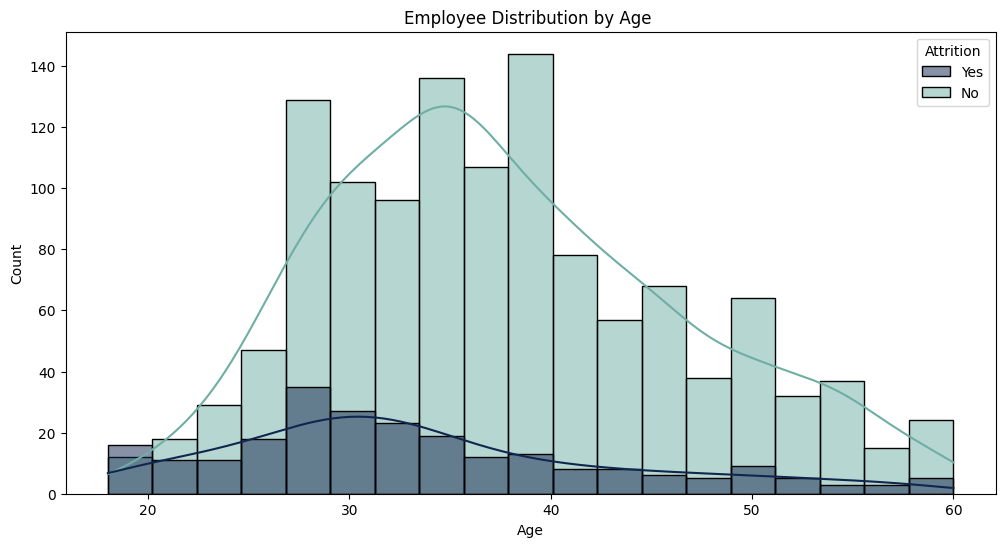

In [27]:
# Employees Distribution by age
plt.figure(figsize=(12,6))
sns.histplot(data= Employee_Data, x = 'Age', hue='Attrition', palette= ["#11264e","#6faea4"], kde=True)
plt.title('Employee Distribution by Age ')

C:\Users\Hp\AppData\Local\Temp\ipykernel_5132\997965491.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Employee_Data, x = 'Attrition', y = 'Age', palette=["#cc66ff","#eeccff"])


Text(0.5, 1.0, 'Employee Distribution by Age & Attrition ')

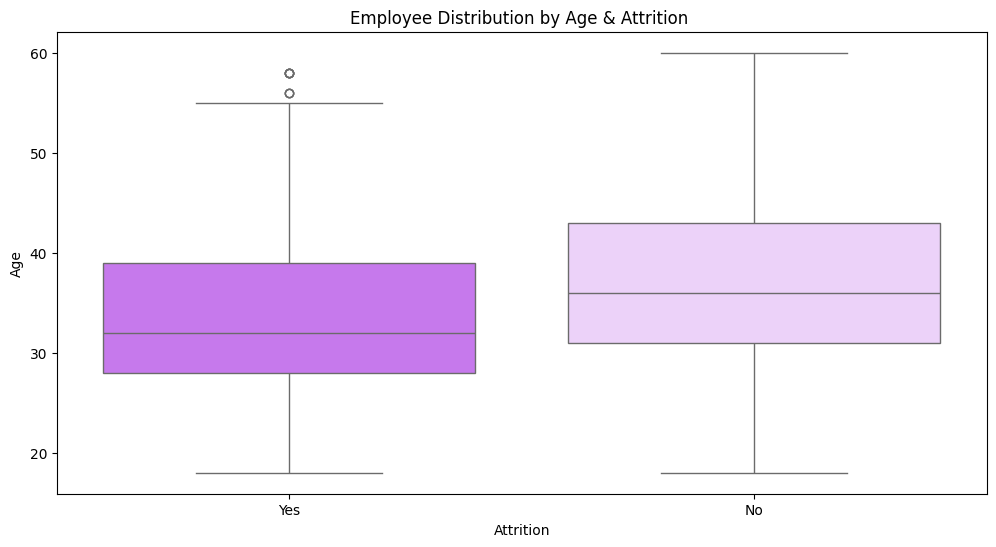

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(data=Employee_Data, x = 'Attrition', y = 'Age', palette=["#cc66ff","#eeccff"])
plt.title('Employee Distribution by Age & Attrition ')

C:\Users\Hp\AppData\Local\Temp\ipykernel_5132\708309552.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bt_2.index,y=bt_2.values,palette=["#0066ff","#4d94ff","#99c2ff"])


Text(0.5, 1.0, 'Attrition Rate by Businees Travel')

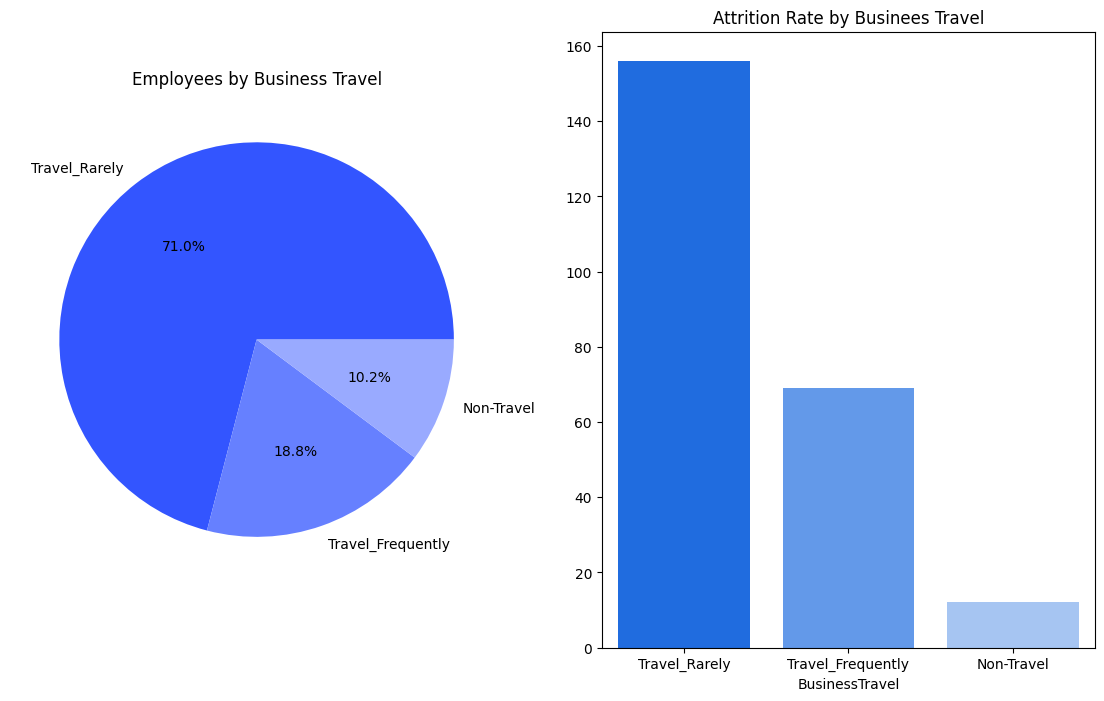

In [29]:
#Visualization to show Total Employees by Businees Travel.
plt.figure(figsize=(14, 8))
plt.subplot(1,2,1)
bt_1 = Employee_Data["BusinessTravel"].value_counts()  # Count unique value in BusinessTravel col
plt.title("Employees by Business Travel")
plt.pie(bt_1.values, labels=bt_1.index, autopct="%.1f%%",colors=['#3355ff', '#6680ff', '#99aaff']) # Distribution  of Employee by businessTravel category

#.figure(figsize=(6,3))
plt.subplot(1,2,2)
new_df = Employee_Data[Employee_Data["Attrition"]=="Yes"] # Rows where attrition is yes
bt_2 = new_df["BusinessTravel"].value_counts() # check attrition if attrition is yes then count businessTravel category
attrition_rate = np.floor((bt_2/bt_1)*100).values
sns.barplot(x=bt_2.index,y=bt_2.values,palette=["#0066ff","#4d94ff","#99c2ff"])
plt.title("Attrition Rate by Businees Travel")


C:\Users\Hp\AppData\Local\Temp\ipykernel_5132\2995023537.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bt_2.index,y=bt_2.values,palette=["#0066ff","#4d94ff","#99c2ff"])


Text(0.5, 1.0, 'Attrition Rate by Businees Travel')

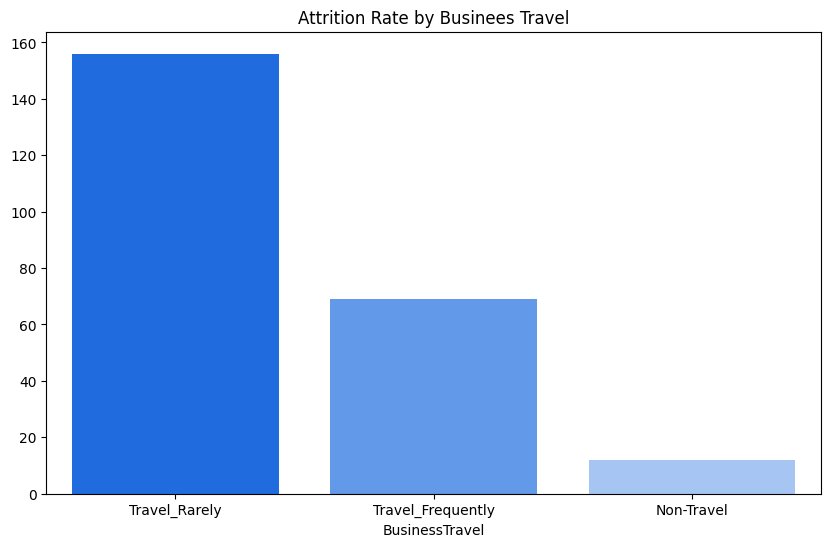

In [30]:
plt.figure(figsize=(10,6))
new_df = Employee_Data[Employee_Data["Attrition"]=="Yes"] # Rows where attrition is yes
bt_2 = new_df["BusinessTravel"].value_counts() # check attrition if attrition is yes then count businessTravel category
attrition_rate = np.floor((bt_2/bt_1)*100).values
sns.barplot(x=bt_2.index,y=bt_2.values,palette=["#0066ff","#4d94ff","#99c2ff"])
plt.title("Attrition Rate by Businees Travel")


EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


Text(0.5, 1.0, 'Education Field Ratio')

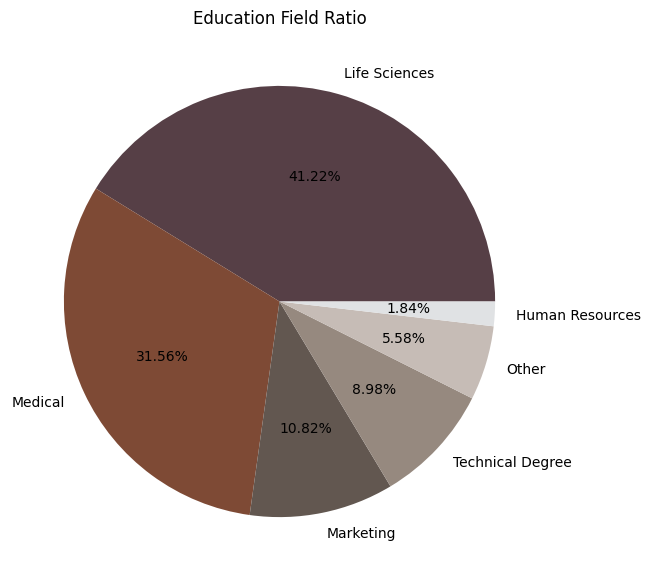

In [31]:
# Distribution of Employee with different eduction fields

val_counts = Employee_Data.EducationField.value_counts()  # Count the unique value
print(val_counts)
labels = val_counts.index
size_labels = val_counts.values
colors = ['#563f46','#7e4a35','#625750','#96897f','#c6bcb6','#e0e2e4']
plt.figure(figsize=(7,7))
plt.pie(size_labels,labels=labels,colors=colors,autopct='%1.2f%%') #This parameter adds percentage labels
plt.title('Education Field Ratio')

In [32]:
Employee_Data['JobSatisfaction'].value_counts().sort_index()

JobSatisfaction
1    289
2    280
3    442
4    459
Name: count, dtype: int64

JobSatisfaction  Attrition
1                No           223
                 Yes           66
2                No           234
                 Yes           46
3                No           369
                 Yes           73
4                No           407
                 Yes           52
dtype: int64


<Axes: xlabel='Attrition', ylabel='count'>

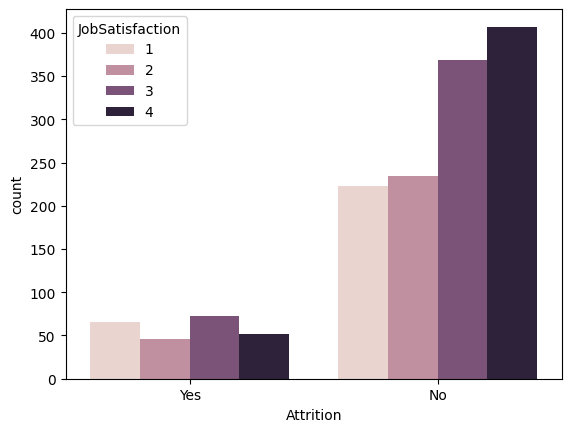

In [33]:
# The Amount of Attrition to job satisfaction value
Group = Employee_Data.groupby(['JobSatisfaction','Attrition']).size()
print(Group)
sns.countplot(x="Attrition", hue='JobSatisfaction', data=Employee_Data)

Attrition
No     1233
Yes     237
Name: count, dtype: int64

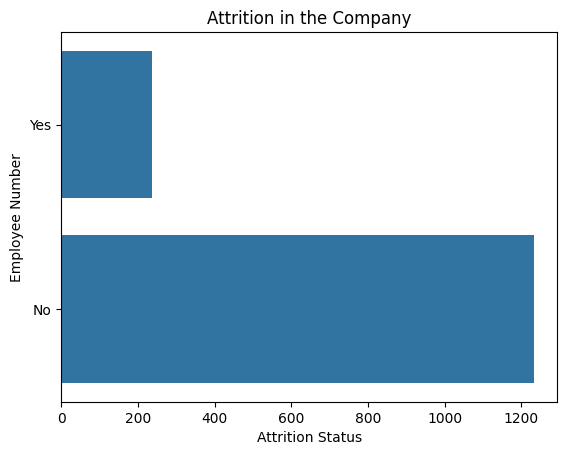

In [34]:
# Target Variable
Trgt = Employee_Data['Attrition']
sns.countplot(Trgt)
plt.title('Attrition in the Company')
plt.xlabel('Attrition Status')
plt.ylabel('Employee Number')
Trgt.value_counts()

# Statistical Analysis

In [35]:
num_cols = Employee_Data.select_dtypes(np.number).columns
num_cols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [36]:
new_df = Employee_Data.copy()

new_df["Attrition"] = new_df["Attrition"].replace({"No":0,"Yes":1})
new_df

C:\Users\Hp\AppData\Local\Temp\ipykernel_5132\3606819265.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df["Attrition"] = new_df["Attrition"].replace({"No":0,"Yes":1})


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [37]:
scaler = MinMaxScaler()

Employee_Data['Age'] = scaler.fit_transform(Employee_Data[['Age']])
Employee_Data['MonthlyIncome'] = scaler.fit_transform(Employee_Data[['MonthlyIncome']])

In [38]:
scaler

,feature_range,"(0, ...)"
,copy,True
,clip,False


- Train  / Test split 

In [39]:
x = Employee_Data.drop('Attrition', axis=1)
y = Employee_Data['Attrition']

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=2024)

In [41]:
xtrain.shape

(1176, 34)

In [42]:
xtest.shape

(294, 34)

In [43]:
label = LabelEncoder()
Employee_Data["Attrition"] = label.fit_transform(Employee_Data.Attrition)

In [44]:
label

LabelEncoder()